In [1]:
from photometry_analysis import *

Analyzing session JOA-M-0026/20250203...
Saved results for JOA-M-0026/20250203 are from different code version. Recomputing...
JOA-M-0026/20250203: Loaded deltaff data with shape: (478919,)
JOA-M-0026/20250203: Loaded pkl data: JOA-M-0026-2025-02-03-115422.pkl
JOA-M-0026/20250203: Found 383 pulse indices
JOA-M-0026/20250203: Successfully epoched 383 valid trials
JOA-M-0026/20250203: 58 missed trials will be excluded from statistics and plots
Saved saved results for JOA-M-0026/20250203 to Z:\delab\lab-members\joschua\photometry_analysis\JOA-M-0026\20250203\analysis_results.pkl
Saved figure for JOA-M-0026/20250203 to Z:\delab\lab-members\joschua\photometry_analysis\JOA-M-0026\20250203\session_results_heatmap_winloss.png


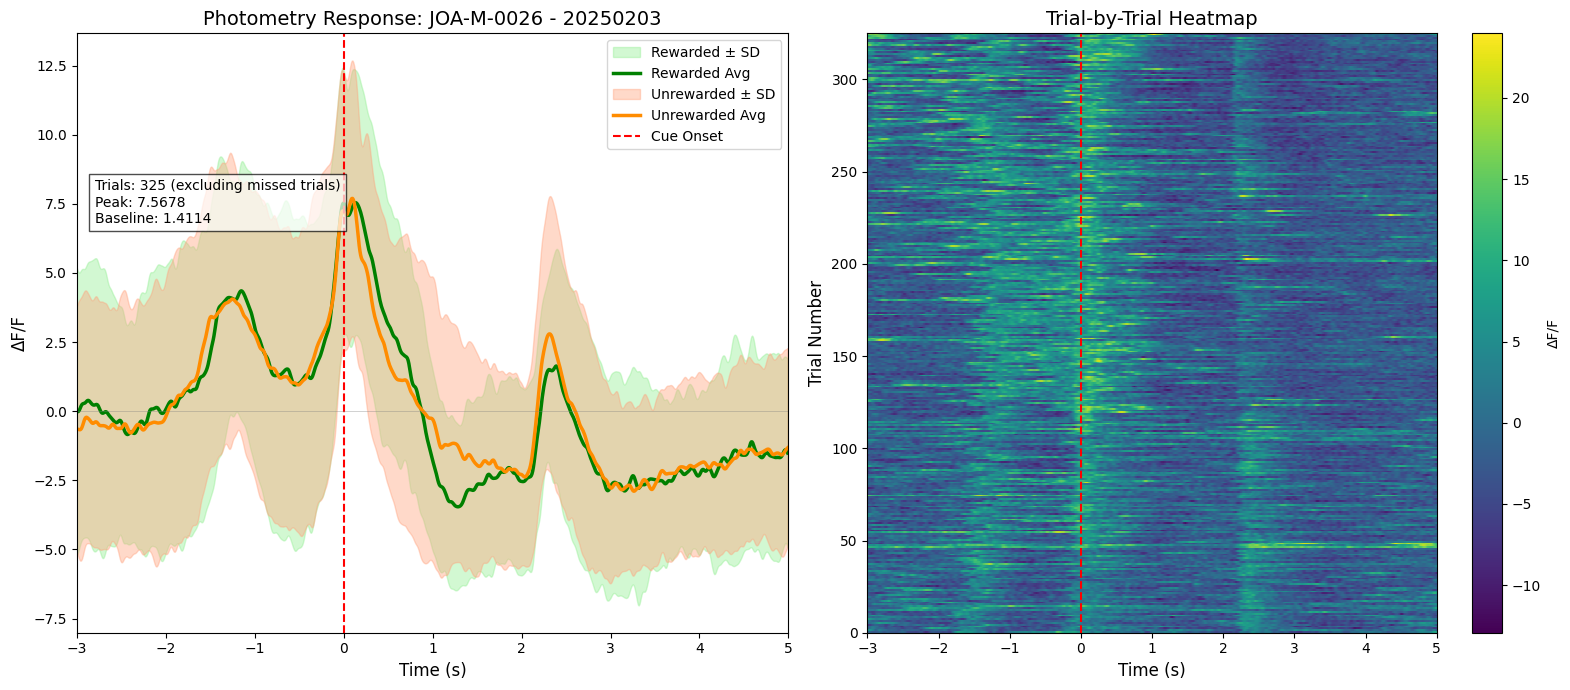

In [2]:
# Analyze a specific subject and session
session_result = analyze_specific_session("JOA-M-0026", "20250203", show_heatmap=True, win_loss=True)

Analyzing pooled results for subject JOA-M-0022...
Saved pooled results for JOA-M-0022 are from different code version. Recomputing...
Processing JOA-M-0022/20250131...
Saved results for JOA-M-0022/20250131 are from different code version. Recomputing...
JOA-M-0022/20250131: Loaded deltaff data with shape: (191095,)
JOA-M-0022/20250131: Loaded pkl data: JOA-M-0022-2025-01-31-154320.pkl
JOA-M-0022/20250131: Found 149 pulse indices
JOA-M-0022/20250131: Successfully epoched 149 valid trials
JOA-M-0022/20250131: 37 missed trials will be excluded from statistics and plots
Saved saved results for JOA-M-0022/20250131 to Z:\delab\lab-members\joschua\photometry_analysis\JOA-M-0022\20250131\analysis_results.pkl
Processing JOA-M-0022/20250201...
Saved results for JOA-M-0022/20250201 are from different code version. Recomputing...
JOA-M-0022/20250201: Loaded deltaff data with shape: (153260,)
JOA-M-0022/20250201: Loaded pkl data: JOA-M-0022-2025-02-01-143938.pkl
JOA-M-0022/20250201: Found 117 puls

<Figure size 1200x700 with 0 Axes>

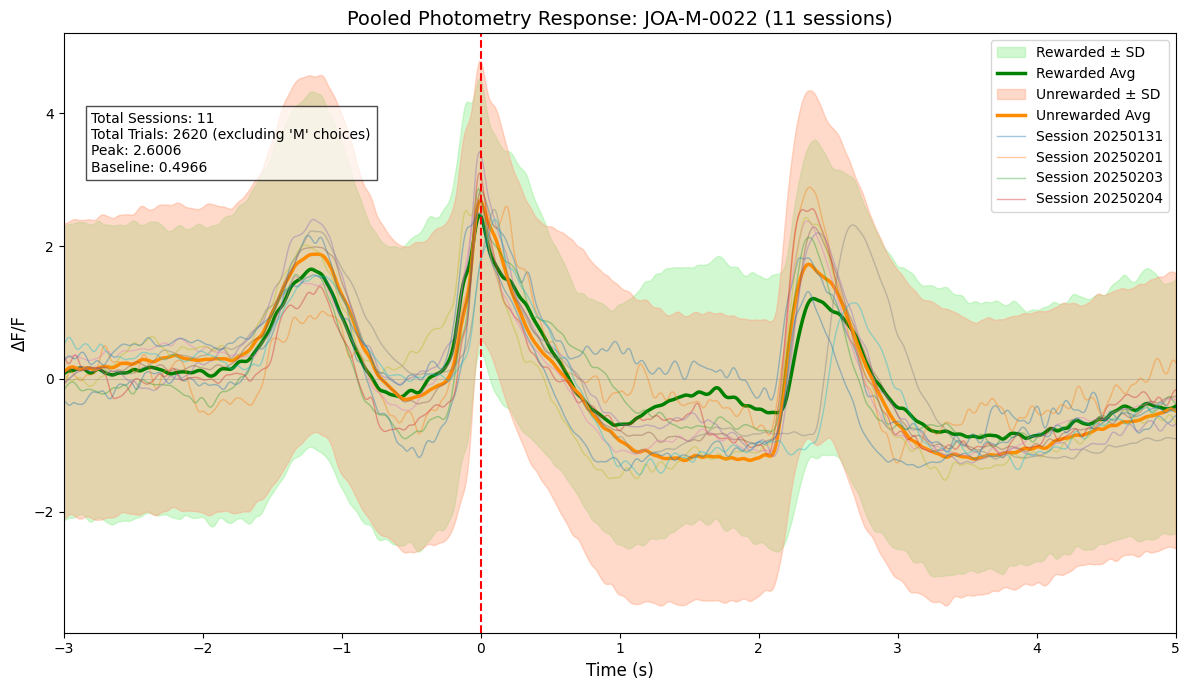

In [3]:
# Analyze all sessions for a specific subject and create pooled visualization
subject_pooled_result = pooled_results("JOA-M-0022", win_loss=True)

Analyzing all subjects...

Processing subject: JOA-M-0022
Saved pooled results for JOA-M-0022 are from different code version. Recomputing...
Processing JOA-M-0022/20250131...
Loaded saved results for JOA-M-0022/20250131
Processing JOA-M-0022/20250201...
Loaded saved results for JOA-M-0022/20250201
Processing JOA-M-0022/20250203...
Loaded saved results for JOA-M-0022/20250203
Processing JOA-M-0022/20250204...
Loaded saved results for JOA-M-0022/20250204
Processing JOA-M-0022/20250206...
Loaded saved results for JOA-M-0022/20250206
Processing JOA-M-0022/20250207...
Loaded saved results for JOA-M-0022/20250207
Processing JOA-M-0022/20250208...
Loaded saved results for JOA-M-0022/20250208
Processing JOA-M-0022/20250210...
Loaded saved results for JOA-M-0022/20250210
Processing JOA-M-0022/20250212...
Loaded saved results for JOA-M-0022/20250212
Processing JOA-M-0022/20250214...
Loaded saved results for JOA-M-0022/20250214
Processing JOA-M-0022/20250215...
Loaded saved results for JOA-M-002

<Figure size 1200x700 with 0 Axes>

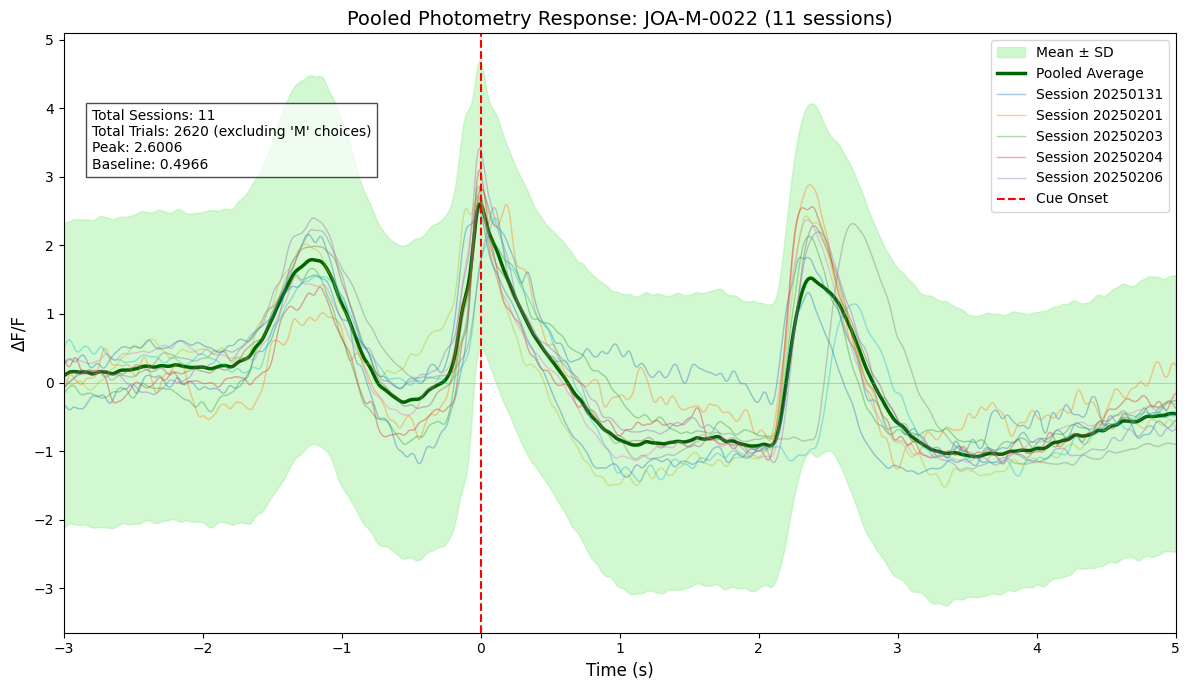


Processing subject: JOA-M-0023
Saved pooled results for JOA-M-0023 are from different code version. Recomputing...
Processing JOA-M-0023/20250203...
Saved results for JOA-M-0023/20250203 are from different code version. Recomputing...
JOA-M-0023/20250203: Loaded deltaff data with shape: (349703,)
JOA-M-0023/20250203: Loaded pkl data: JOA-M-0023-2025-02-03-140839.pkl
JOA-M-0023/20250203: Found 291 pulse indices
JOA-M-0023/20250203: Successfully epoched 291 valid trials
JOA-M-0023/20250203: 11 missed trials will be excluded from statistics and plots
Saved saved results for JOA-M-0023/20250203 to Z:\delab\lab-members\joschua\photometry_analysis\JOA-M-0023\20250203\analysis_results.pkl
Processing JOA-M-0023/20250205...
Saved results for JOA-M-0023/20250205 are from different code version. Recomputing...
JOA-M-0023/20250205: Loaded deltaff data with shape: (334814,)
JOA-M-0023/20250205: Loaded pkl data: JOA-M-0023-2025-02-05-140411.pkl
JOA-M-0023/20250205: Found 269 pulse indices
JOA-M-002

<Figure size 1200x700 with 0 Axes>

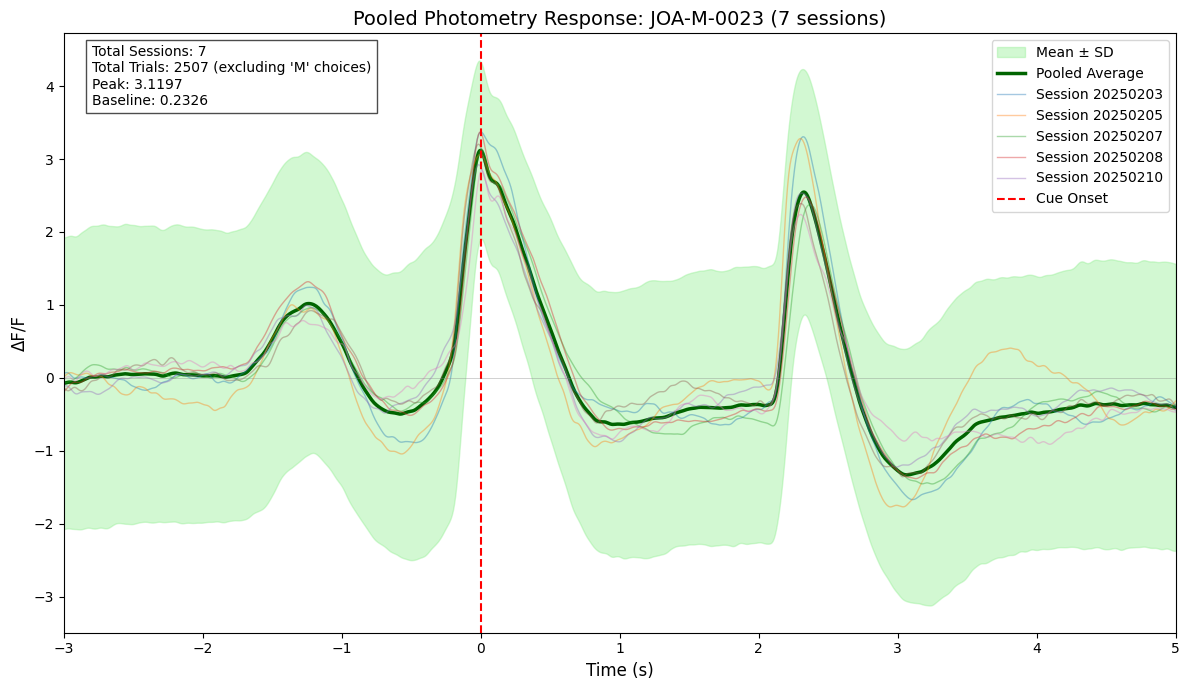


Processing subject: JOA-M-0024
Saved pooled results for JOA-M-0024 are from different code version. Recomputing...
Processing JOA-M-0024/20250201...
Saved results for JOA-M-0024/20250201 are from different code version. Recomputing...
JOA-M-0024/20250201: Loaded deltaff data with shape: (308927,)
JOA-M-0024/20250201: Loaded pkl data: JOA-M-0024-2025-02-01-152804.pkl
JOA-M-0024/20250201: Found 256 pulse indices
JOA-M-0024/20250201: Successfully epoched 256 valid trials
JOA-M-0024/20250201: 20 missed trials will be excluded from statistics and plots
Saved saved results for JOA-M-0024/20250201 to Z:\delab\lab-members\joschua\photometry_analysis\JOA-M-0024\20250201\analysis_results.pkl
Processing JOA-M-0024/20250204...
Saved results for JOA-M-0024/20250204 are from different code version. Recomputing...
JOA-M-0024/20250204: Loaded deltaff data with shape: (442288,)
JOA-M-0024/20250204: Loaded pkl data: JOA-M-0024-2025-02-04-142745.pkl
JOA-M-0024/20250204: Found 366 pulse indices
JOA-M-002

<Figure size 1200x700 with 0 Axes>

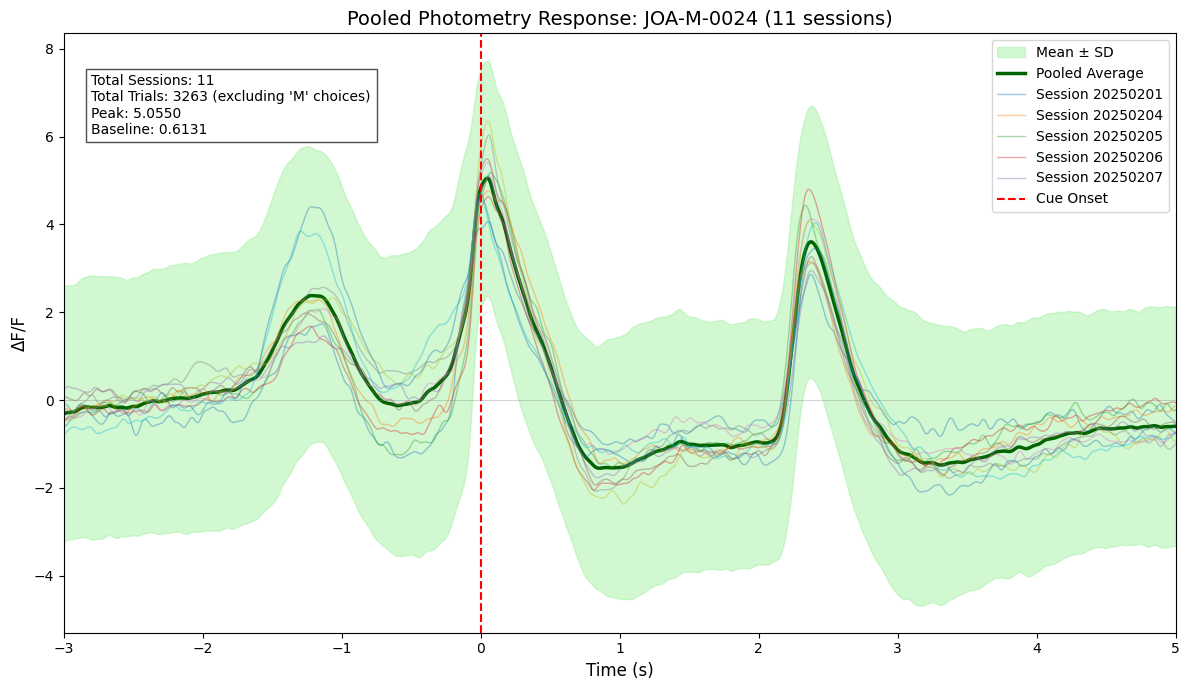


Processing subject: JOA-M-0025
Saved pooled results for JOA-M-0025 are from different code version. Recomputing...
Processing JOA-M-0025/20250131...
Saved results for JOA-M-0025/20250131 are from different code version. Recomputing...
JOA-M-0025/20250131: Loaded deltaff data with shape: (206339,)
JOA-M-0025/20250131: Loaded pkl data: JOA-M-0025-2025-01-31-143155.pkl
JOA-M-0025/20250131: Found 167 pulse indices
JOA-M-0025/20250131: Successfully epoched 167 valid trials
JOA-M-0025/20250131: 14 missed trials will be excluded from statistics and plots
Saved saved results for JOA-M-0025/20250131 to Z:\delab\lab-members\joschua\photometry_analysis\JOA-M-0025\20250131\analysis_results.pkl
Processing JOA-M-0025/20250203...
Saved results for JOA-M-0025/20250203 are from different code version. Recomputing...
JOA-M-0025/20250203: Loaded deltaff data with shape: (255652,)
JOA-M-0025/20250203: Loaded pkl data: JOA-M-0025-2025-02-03-135510.pkl
JOA-M-0025/20250203: Found 174 pulse indices
JOA-M-002

<Figure size 1200x700 with 0 Axes>

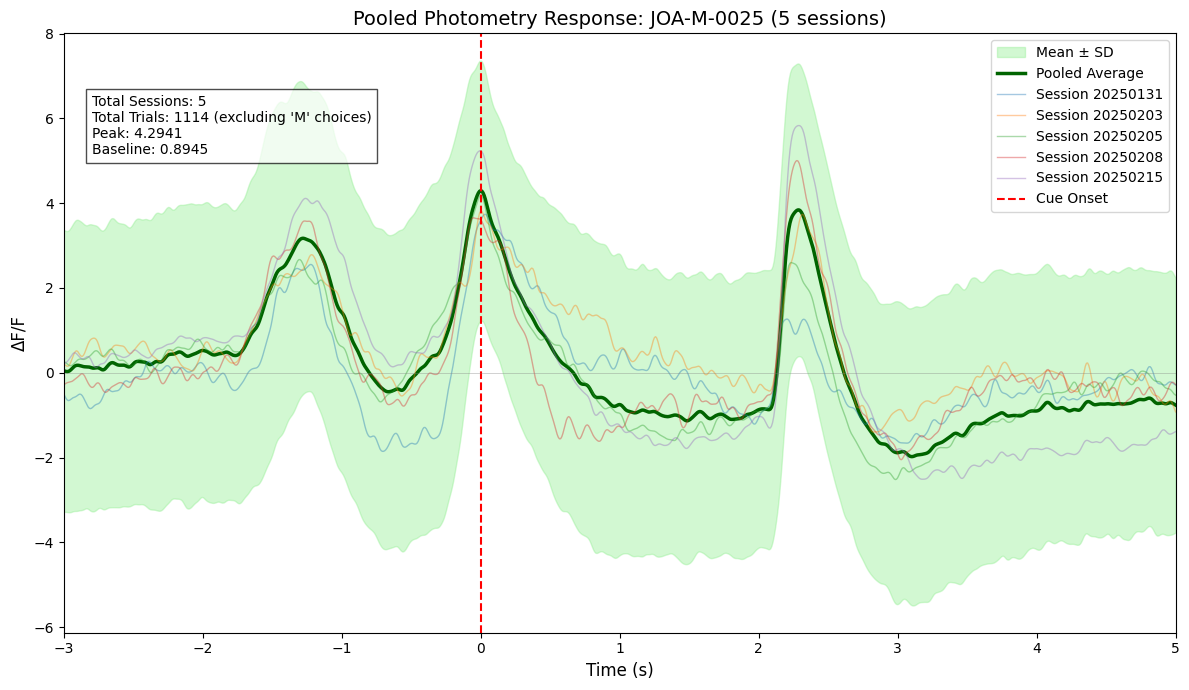


Processing subject: JOA-M-0026
Saved pooled results for JOA-M-0026 are from different code version. Recomputing...
Processing JOA-M-0026/20250131...
Loaded saved results for JOA-M-0026/20250131
Processing JOA-M-0026/20250201...
Saved results for JOA-M-0026/20250201 are from different code version. Recomputing...
JOA-M-0026/20250201: Loaded deltaff data with shape: (452318,)
JOA-M-0026/20250201: Loaded pkl data: JOA-M-0026-2025-02-01-161209.pkl
JOA-M-0026/20250201: Found 373 pulse indices
JOA-M-0026/20250201: Successfully epoched 373 valid trials
JOA-M-0026/20250201: 27 missed trials will be excluded from statistics and plots
Saved saved results for JOA-M-0026/20250201 to Z:\delab\lab-members\joschua\photometry_analysis\JOA-M-0026\20250201\analysis_results.pkl
Processing JOA-M-0026/20250203...
Loaded saved results for JOA-M-0026/20250203
Processing JOA-M-0026/20250205...
Saved results for JOA-M-0026/20250205 are from different code version. Recomputing...
JOA-M-0026/20250205: Loaded de

<Figure size 1200x700 with 0 Axes>

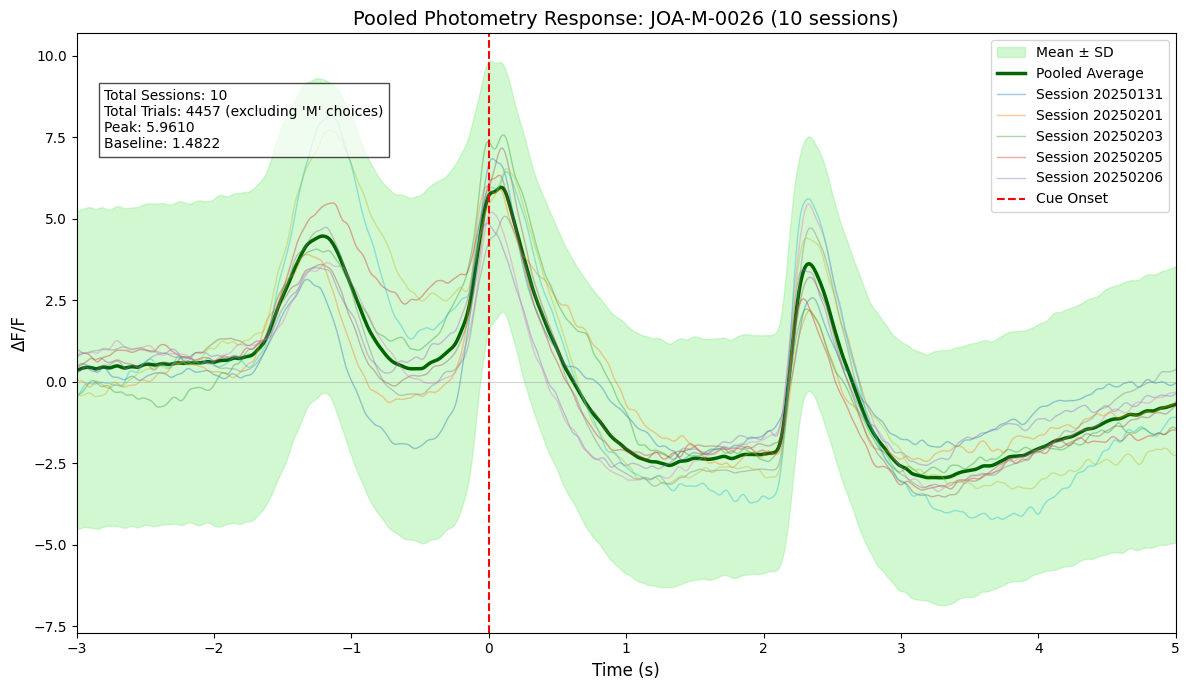


Processed 5 subjects with data


In [4]:
# Process all subjects and sessions
results, subject_list = all_results(win_loss=False)

In [ ]:
select_and_visualize(show_heatmap=False, win_loss=True)